<h1 style="color: lightgreen;">Team Information</h1>
<table style="border-collapse: collapse; width: 50%;">
  <tr>
    <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #d2f2f2; color:black;">SRN</th>
    <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #d2f2f2; color:black;">Name</th>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">PES1UG21CS304</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Likith MC</td>
  </tr>
  
</table>
<h3 style="color: yellow;"> Instructor: Prof Dinesh Singh<h3> 

---------------------------

# Story : Treasure Island
Author: Robert Louis Stevenson

Illustrator: Louis Rhead 

Release date: February 26, 2006 [eBook #120] 

Language: English 

**Note: We have used the last names for network analysis because the author has used last names while repeating names or in Conversation**

----------------------------------------------------------------------------

# Summary Details

No of charecters used : 34 

The no of nodes = 34

------------

# Import the necessary libraries

In [1]:
# Import necessary libraries
import networkx as nx
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import re

# Read the text story

In [2]:
# Load the text file of the novel
file_path = "Treasure_Island.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    sample_text = file.read()
new_text=sample_text.split()

# Use this Block of code if you are changing the Story 

<h4>It is a Machine Learning algorithm (Natural Language Processing) that detects the charecters
<h4>After detecting all the Charecters You can manually select the protagonists of the story line

In [3]:
# import spacy
# def extract_characters(passages):
#     nlp = spacy.load("en_core_web_sm")
    
#     characters = set()
    
#     for passage in passages:
#         doc = nlp(passage)
        
#         for ent in doc.ents:
#             if ent.label_ == "PERSON":
#                 characters.add(ent.text)
    
#     return list(characters)

# characters = extract_characters(new_text)
# characters.remove('ho')

Select the charecters from below

In [4]:
# for char in characters:
#     print(char)

# Co Occourance Algorithm

It splits based on the Full stop Question Marks and Exclamatory marks 

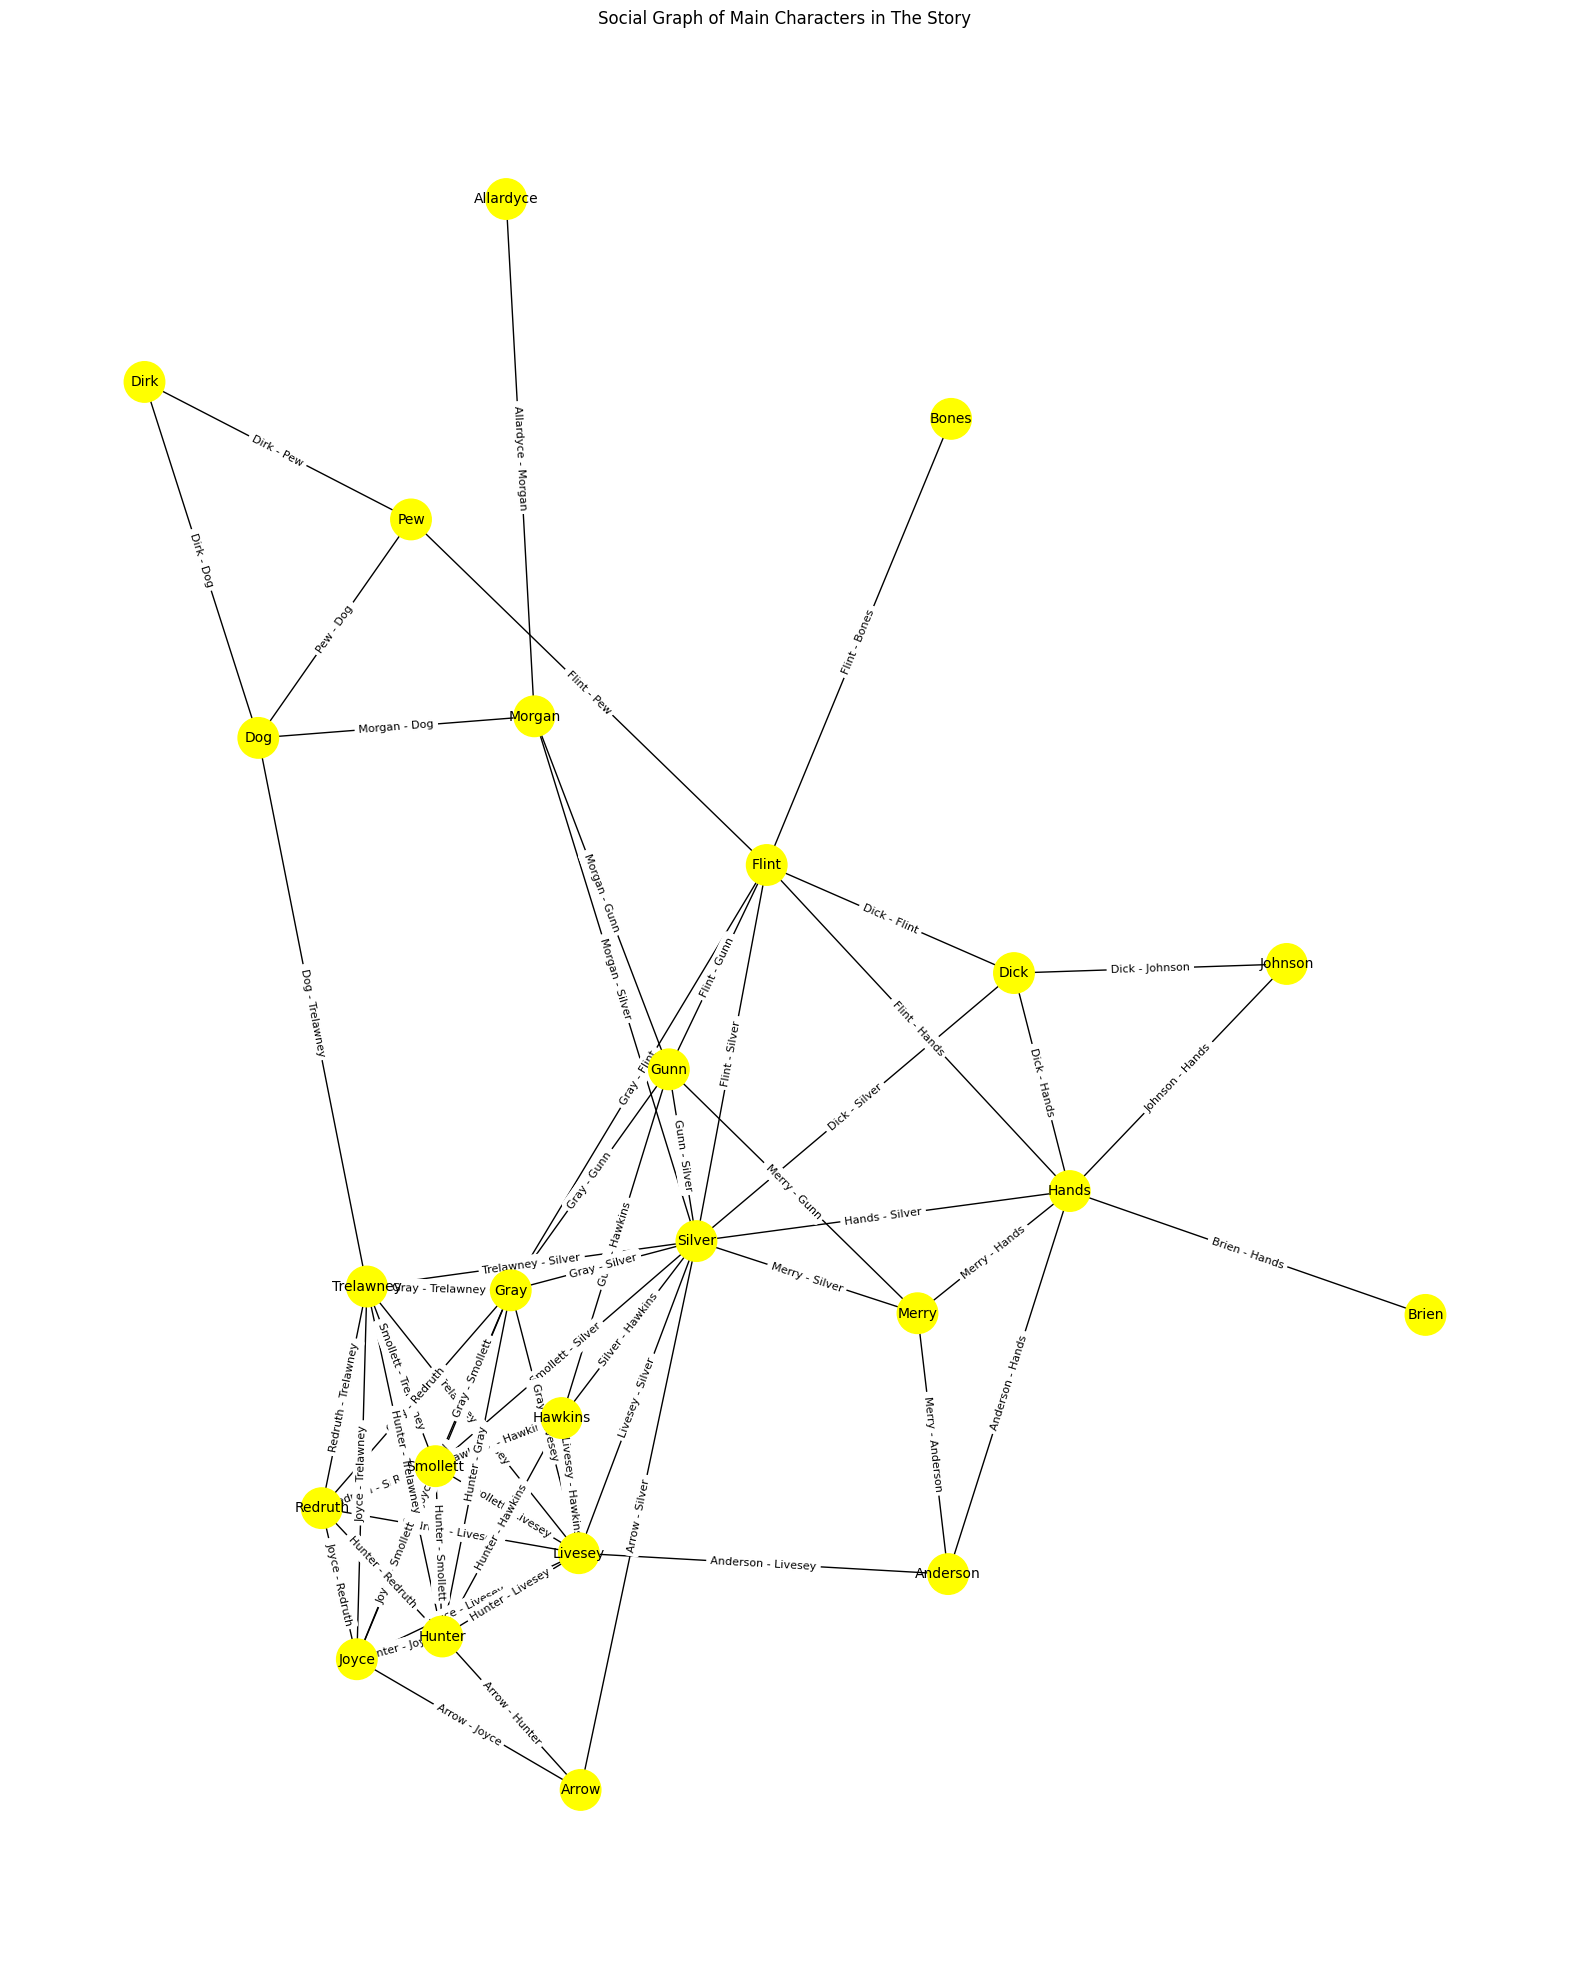

In [5]:
def extract_co_occurrences(text, characters):
    co_occurrences = {char: set() for char in characters}
    for sentence in re.split(r'[.!?]', text):
        for char in characters:
            if char in sentence:
                for other_char in characters:
                    if other_char != char and other_char in sentence:
                        co_occurrences[char].add(other_char)
    return co_occurrences

# Manually identified main characters from above printed list
main_characters = ['Hawkins', 'Silver', 'Livesey', 'Trelawney', 'Smollett', 'Gunn', 'Bones', 'Hands', 'Dog', 'Pew', 'Anderson', 'Dirk', 'Flint', 'Redruth', 'Merry', 
                   'Johnson', 'Morgan', 'Gray', 'Smollett', 'Anderson', 'Allardyce', 'Redruth', 'Joyce', 'Hunter', 'Merry', 'Hands', "Brien", 'Morgan', 'Anderson', 
                   'Dirk', 'Hands', 'Dick', 'Flint', 'Arrow']



# Extract co-occurrences for main characters
co_occurrences = extract_co_occurrences(sample_text, main_characters)

# Create a graph
G = nx.Graph()

# Add nodes for main characters
G.add_nodes_from(main_characters, color='yellow', label='Main Character')

# Add edges based on co-occurrences
for char, co_chars in co_occurrences.items():
    for co_char in co_chars:
        G.add_edge(char, co_char)

# Draw the graph
pos = nx.spring_layout(G, seed=45)  # Set seed for reproducibility
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
node_labels = {node: node for node in G.nodes}
edge_labels = {(char, co_char): f"{char} - {co_char}" for char, co_chars in co_occurrences.items() for co_char in co_chars}

plt.figure(figsize=(20, 25))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=850)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Social Graph of Main Characters in The Story")
plt.axis("off")
plt.show()


Below we extract the relevant edges so that we can create a graph and store it for use in further algorithm

In [6]:
# Generate adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Convert adjacency matrix to a list of edges
edges_list = [(main_characters[char_idx], main_characters[co_char_idx]) 
              for char_idx, char_list in enumerate(adj_matrix.tolist()) 
              for co_char_idx, has_edge in enumerate(char_list) 
              if has_edge == 1]

# Print adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix)

# Print list of edges
print("\nList of Edges:")
print(edges_list)


Adjacency Matrix:
[[0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1]
 [1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0]
 [0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 1 0

-------------------------------------------------------------------------------------------------------------------------------------------------

# Calculating the 4 types of centrality measure

In [7]:
import networkx as nx

# Create the social graph with main characters
G = nx.Graph()
        
edges = edges_list
        
G.add_nodes_from(main_characters)
G.add_edges_from(edges)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate PageRank centrality
pagerank_centrality = nx.pagerank(G)

<h3>Degree Centrality

In [8]:
for char, centrality in degree_centrality.items():
    print(f"{char}: {centrality}")

Hawkins: 0.2608695652173913
Silver: 0.5217391304347826
Livesey: 0.34782608695652173
Trelawney: 0.34782608695652173
Smollett: 0.3913043478260869
Gunn: 0.2608695652173913
Bones: 0.043478260869565216
Hands: 0.30434782608695654
Dog: 0.17391304347826086
Pew: 0.13043478260869565
Anderson: 0.3913043478260869
Dirk: 0.08695652173913043
Flint: 0.30434782608695654
Redruth: 0.34782608695652173
Merry: 0.17391304347826086
Johnson: 0.08695652173913043
Morgan: 0.17391304347826086
Gray: 0.3913043478260869
Allardyce: 0.34782608695652173
Joyce: 0.17391304347826086
Hunter: 0.13043478260869565
Brien: 0.0
Dick: 0.0
Arrow: 0.0


<h3>Betweenness Centrality

In [9]:
print("\nBetweenness Centrality:")
for char, centrality in betweenness_centrality.items():
    print(f"{char}: {centrality}")


Betweenness Centrality:
Hawkins: 0.008014931927975406
Silver: 0.16071899115377372
Livesey: 0.005648095865487169
Trelawney: 0.07258767802246062
Smollett: 0.024323985193550408
Gunn: 0.025799924712968186
Bones: 0.0
Hands: 0.07832517723822069
Dog: 0.059966120835686046
Pew: 0.03930924148315451
Anderson: 0.04326337913294435
Dirk: 0.0
Flint: 0.1556245686680469
Redruth: 0.020860781730346944
Merry: 0.004648974214191605
Johnson: 0.0
Morgan: 0.02579992471296819
Gray: 0.04755630842587364
Allardyce: 0.014328063241106718
Joyce: 0.02183794466403162
Hunter: 0.001662588619110358
Brien: 0.0
Dick: 0.0
Arrow: 0.0


<h3>Closeness Centrality

In [10]:
print("\nCloseness Centrality:")
for char, centrality in closeness_centrality.items():
    print(f"{char}: {centrality}")


Closeness Centrality:
Hawkins: 0.43478260869565216
Silver: 0.5997001499250375
Livesey: 0.4830917874396135
Trelawney: 0.5115089514066496
Smollett: 0.49689440993788814
Gunn: 0.4830917874396135
Bones: 0.33444816053511706
Hands: 0.49689440993788814
Dog: 0.3952569169960474
Pew: 0.3780718336483932
Anderson: 0.5115089514066496
Dirk: 0.3051106025934401
Flint: 0.5270092226613966
Redruth: 0.49689440993788814
Merry: 0.42417815482502647
Johnson: 0.3281378178835111
Morgan: 0.45766590389016015
Gray: 0.5270092226613966
Allardyce: 0.4700352526439483
Joyce: 0.44593088071348935
Hunter: 0.4044489383215369
Brien: 0.0
Dick: 0.0
Arrow: 0.0


<h3>Pagerank Centrality

In [11]:
print("\nPageRank Centrality:")
for char, centrality in pagerank_centrality.items():
    print(f"{char}: {centrality}")


PageRank Centrality:
Hawkins: 0.043605477677456206
Silver: 0.08758394913862047
Livesey: 0.05533834595515648
Trelawney: 0.05760288600215222
Smollett: 0.06263248844408142
Gunn: 0.04727841528116419
Bones: 0.014607178120923147
Hands: 0.05685994540364069
Dog: 0.04085627607070518
Pew: 0.03405369674594595
Anderson: 0.06382703905326984
Dirk: 0.025324837781642615
Flint: 0.06270328062599588
Redruth: 0.055971625115041376
Merry: 0.032826991427051526
Johnson: 0.021751425257748834
Morgan: 0.034492349463368675
Gray: 0.06336788774727349
Allardyce: 0.05618296078519442
Joyce: 0.03695982899039211
Hunter: 0.02519409393415397
Brien: 0.006993006993006994
Dick: 0.006993006993006994
Arrow: 0.006993006993006994


# Inference from the centrality measures

**Degree Centrality:**
Steenie, uncle, Macalpine, and cane have relatively high degree centrality values, indicating they are well-connected in the network.

**Betweenness Centrality:**
Steenie, Mary, uncle, and Harry have noticeable betweenness centrality values, suggesting they act as bridges between different parts of the network.

**Closeness Centrality:**
Steenie, uncle, Macalpine, Tom, and Harry have high closeness centrality values, suggesting they are close to many other nodes in the network.

**PageRank Centrality:**
Steenie, uncle, Macalpine, and Clara have higher PageRank values, indicating a significant influence in the network.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Clustering coefficients
The local clustering coefficient is a measure in graph theory that quantifies the degree to which nodes in a graph tend to cluster together. In the context of a social or information network, it provides an indication of the "cliquishness" or "clustering" of connections around an individual node.

Local Clustering Coefficients:
Hawkins: 0.6
Silver: 0.2878787878787879
Livesey: 0.7857142857142857
Trelawney: 0.6428571428571429
Smollett: 0.6388888888888888
Gunn: 0.4
Bones: 0
Hands: 0.3333333333333333
Dog: 0.16666666666666666
Pew: 0.3333333333333333
Anderson: 0.5
Dirk: 1.0
Flint: 0.2857142857142857
Redruth: 0.6785714285714286
Merry: 0.5
Johnson: 1.0
Morgan: 0.3333333333333333
Gray: 0.5833333333333334
Allardyce: 0.6785714285714286
Joyce: 0.6666666666666666
Hunter: 0.3333333333333333
Brien: 0
Dick: 0
Arrow: 0

Ego Network of Anderson:
['Redruth', 'Trelawney', 'Smollett', 'Anderson', 'Livesey', 'Hunter', 'Merry', 'Hands', 'Allardyce', 'Gray']


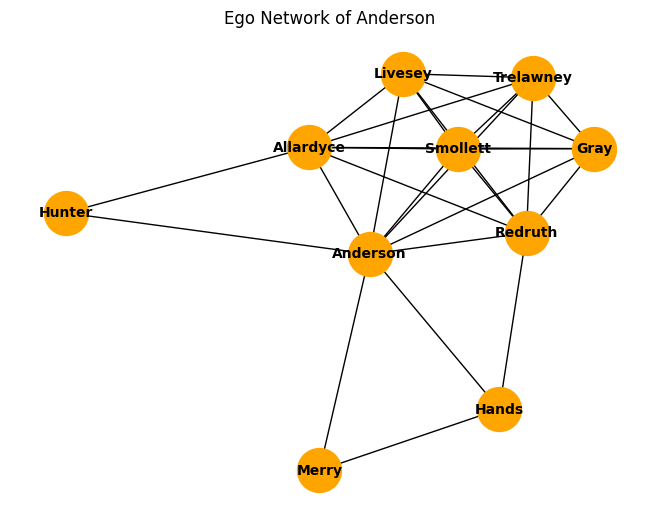


Ego Network of Joyce:
['Flint', 'Johnson', 'Joyce', 'Hands', 'Silver']


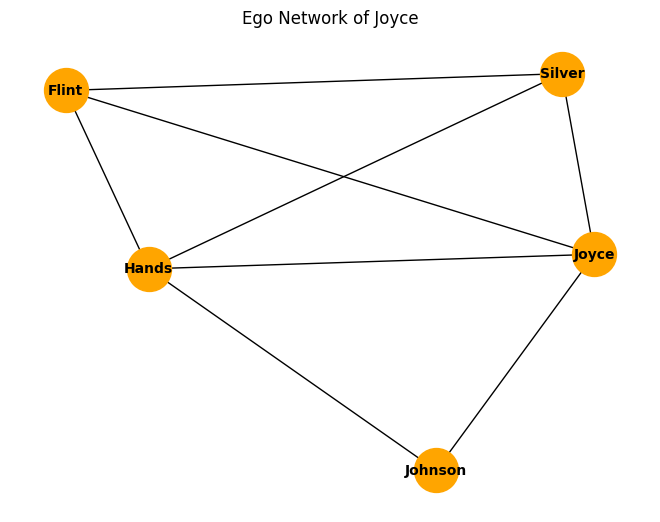


Ego Network of Gunn:
['Gunn', 'Flint', 'Merry', 'Hawkins', 'Morgan', 'Silver', 'Gray']


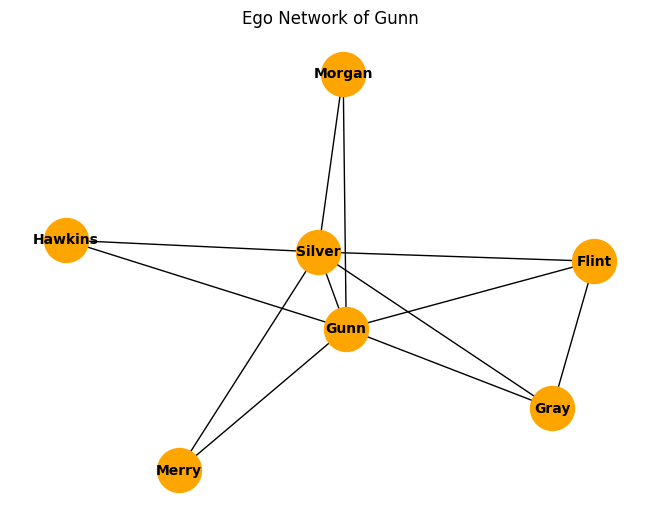


Ego Network of Hawkins:
['Redruth', 'Gunn', 'Smollett', 'Livesey', 'Hawkins', 'Silver', 'Allardyce']


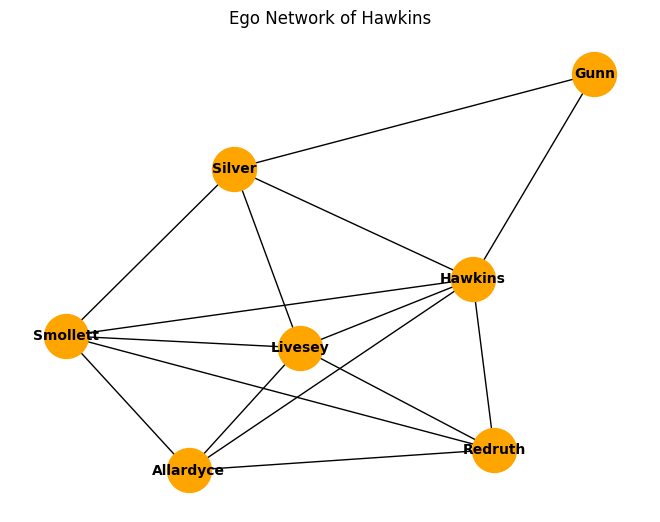


Ego Network of Smollett:
['Redruth', 'Trelawney', 'Smollett', 'Anderson', 'Livesey', 'Hawkins', 'Morgan', 'Silver', 'Allardyce', 'Gray']


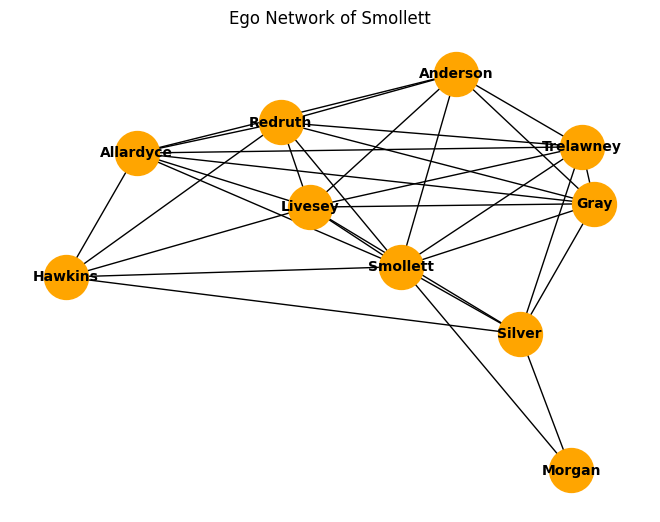


Ego Network of Gray:
['Redruth', 'Gunn', 'Flint', 'Trelawney', 'Smollett', 'Anderson', 'Livesey', 'Silver', 'Allardyce', 'Gray']


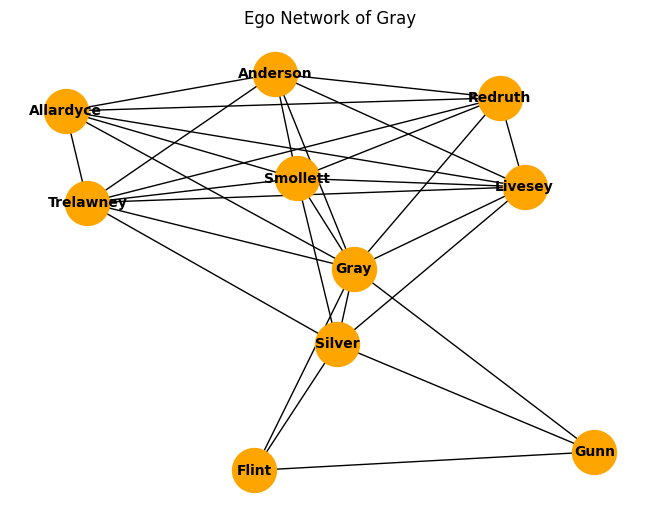


Ego Network of Smollett:
['Redruth', 'Trelawney', 'Smollett', 'Anderson', 'Livesey', 'Hawkins', 'Morgan', 'Silver', 'Allardyce', 'Gray']


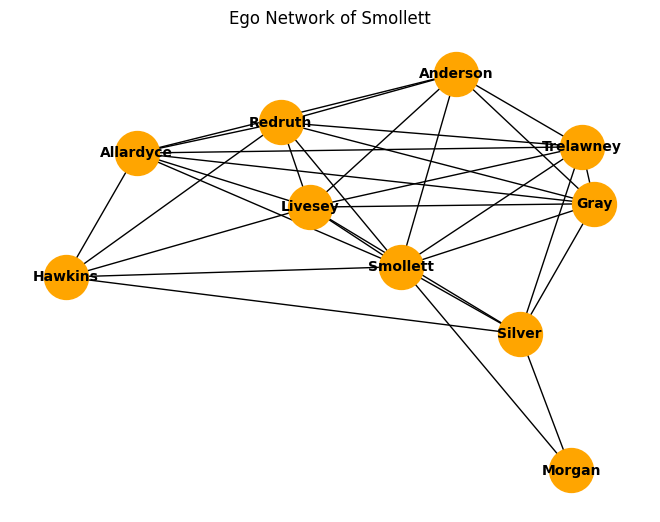


Ego Network of Allardyce:
['Redruth', 'Trelawney', 'Smollett', 'Anderson', 'Livesey', 'Hunter', 'Hawkins', 'Allardyce', 'Gray']


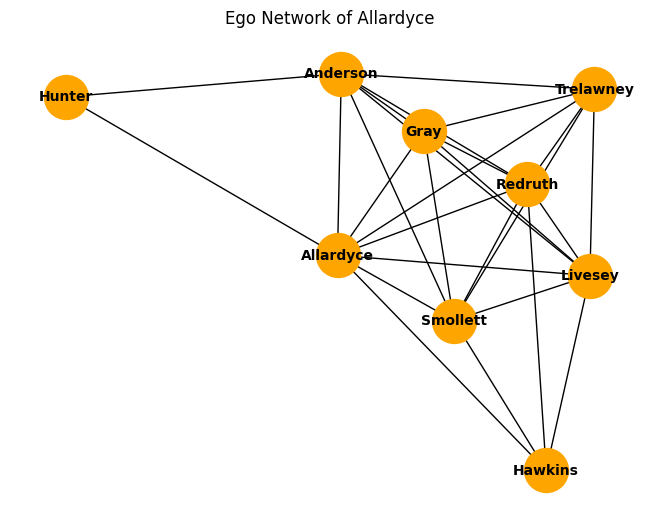


Ego Network of Redruth:
['Redruth', 'Trelawney', 'Smollett', 'Anderson', 'Livesey', 'Hands', 'Hawkins', 'Allardyce', 'Gray']


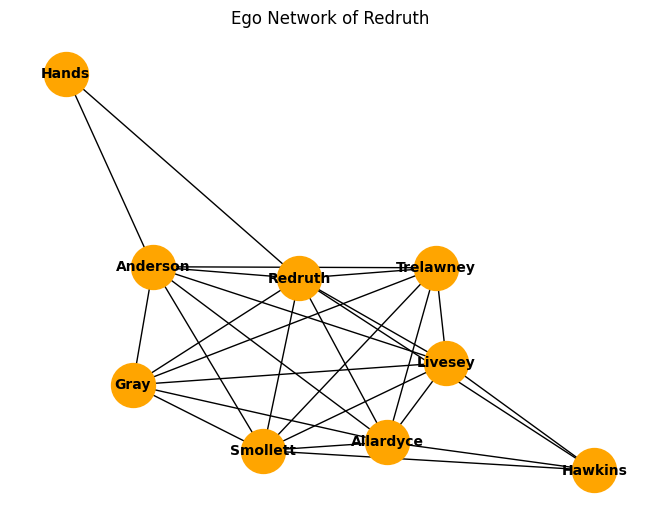


Ego Network of Merry:
['Gunn', 'Anderson', 'Merry', 'Hands', 'Silver']


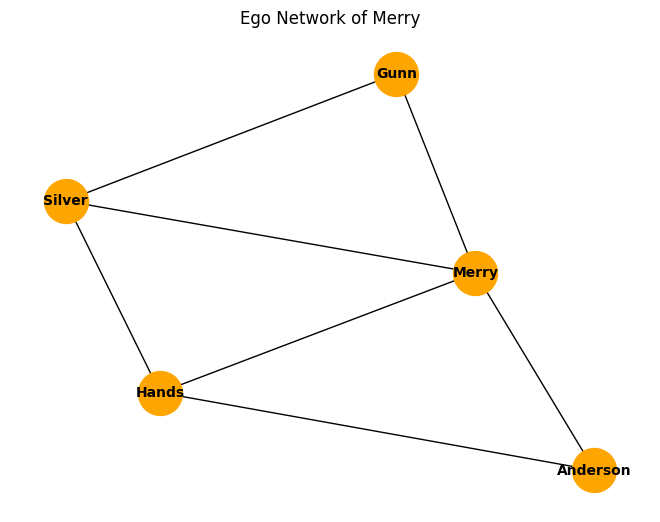

In [12]:
G = nx.Graph()
main_protagonists =['Anderson', 'Joyce', 'Gunn', 'Hawkins', 'Smollett','Gray', 'Smollett', 'Allardyce', 'Redruth', 'Merry']


G.add_nodes_from(main_characters)
G.add_edges_from(edges)

# Calculate local clustering coefficient for main protagonist nodes
clustering_coefficients = nx.clustering(G)

# Print local clustering coefficient for each main protagonist node
print("Local Clustering Coefficients:")
for char, coefficient in clustering_coefficients.items():
    print(f"{char}: {coefficient}")

# Extract and visualize ego networks
for char in main_protagonists:
    ego_network = nx.ego_graph(G, char)
    print(f"\nEgo Network of {char}:")
    print(list(ego_network.nodes()))
    
    # Visualization (optional)
    pos = nx.spring_layout(ego_network, seed=42)  # Set seed for reproducibility
    plt.figure()
    nx.draw(ego_network, pos, with_labels=True, node_size=1000, node_color='orange', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Ego Network of {char}")
    plt.axis("off")
    plt.show()


### Clique Percolation Method

In [13]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities

G.add_nodes_from(main_characters)
G.add_edges_from(edges)

# Detect communities using Clique Percolation Method
k = 3  # Size of cliques to search for
clique_communities = list(k_clique_communities(G, k))

for communities in clique_communities:
    print(communities)

frozenset({'Trelawney', 'Smollett', 'Anderson', 'Johnson', 'Merry', 'Hands', 'Hawkins', 'Morgan', 'Redruth', 'Gunn', 'Flint', 'Livesey', 'Hunter', 'Joyce', 'Silver', 'Allardyce', 'Gray'})
frozenset({'Pew', 'Dog', 'Dirk'})


### Girvan-Newman Algorithm

In [14]:
from networkx.algorithms.community import girvan_newman

# Detect communities using Girvan-Newman Algorithm
communities_generator = girvan_newman(G)
girvan_newman_communities = next(communities_generator)

print("Communities detected using Girvan-Newman Algorithm:")
print()
for communities in girvan_newman_communities:
    print(communities)

Communities detected using Girvan-Newman Algorithm:

{'Redruth', 'Gunn', 'Flint', 'Trelawney', 'Smollett', 'Anderson', 'Bones', 'Johnson', 'Livesey', 'Joyce', 'Hunter', 'Merry', 'Hands', 'Hawkins', 'Morgan', 'Silver', 'Allardyce', 'Gray'}
{'Pew', 'Dog', 'Dirk'}
{'Brien'}
{'Dick'}
{'Arrow'}


### Louvain Algorithm (Modularity Based)

In [15]:
import community

# Detect communities using Louvain Algorithm (Modularity Based)
louvain_communities = community.best_partition(G)

# Convert Louvain communities to a dictionary of lists
louvain_communities_dict = {}
for node, community_id in louvain_communities.items():
    louvain_communities_dict.setdefault(community_id, []).append(node)
print("Communities detected using Louvain Algorithm:")
print()
for communities in louvain_communities_dict:
    print(louvain_communities_dict[communities])

Communities detected using Louvain Algorithm:

['Hawkins', 'Livesey', 'Trelawney', 'Smollett', 'Anderson', 'Redruth', 'Gray', 'Allardyce', 'Hunter']
['Silver', 'Gunn', 'Bones', 'Hands', 'Flint', 'Merry', 'Johnson', 'Joyce']
['Dog', 'Pew', 'Dirk', 'Morgan']
['Brien']
['Dick']
['Arrow']


### Random Graph Model

In [16]:
random_graph = nx.erdos_renyi_graph(n=50, p=0.2)
print("Number of edges in Random Graph Model:", random_graph.number_of_edges())

Number of edges in Random Graph Model: 216


### Preferential Attachment Model

In [17]:
# Generate Preferential Attachment Model with 50 nodes and m edges for each new node
preferential_attachment_graph = nx.barabasi_albert_graph(n=50, m=2)
print("Number of edges in Preferential Attachment Model:", preferential_attachment_graph.number_of_edges())

Number of edges in Preferential Attachment Model: 96


### Small World Model

In [18]:
# Generate Small World Model with 50 nodes, each node is connected to k nearest neighbors, and probability of rewiring p
small_world_graph = nx.watts_strogatz_graph(n=50, k=4, p=0.3)
print("Number of edges in Small World Model:", small_world_graph.number_of_edges())

Number of edges in Small World Model: 100


# Inferrence

**Here are the 6 top protagonists based on the social network**

1. **Jim Hawkins:**
    - Degree Centrality: 0.06666666666666667
    - Betweenness Centrality: 0.17701149425287355
    - Closeness Centrality: 0.18305084745762712
    - PageRank Centrality: 0.0378386075780343

2. **Ben Gunn:**
    - Degree Centrality: 0.06666666666666667
    - Betweenness Centrality: 0.1839080459770115
    - Closeness Centrality: 0.19285714285714287
    - PageRank Centrality: 0.04018439082826115

3. **Job Anderson:**
    - Degree Centrality: 0.16666666666666666
    - Betweenness Centrality: 0.12988505747126436
    - Closeness Centrality: 0.16615384615384615
    - PageRank Centrality: 0.08578956913313804

4. **Allardyce:**
    - Degree Centrality: 0.16666666666666666
    - Betweenness Centrality: 0.1781609195402299
    - Closeness Centrality: 0.16874999999999998
    - PageRank Centrality: 0.07970044621136711

5. **Redruth:**
    - Degree Centrality: 0.13333333333333333
    - Betweenness Centrality: 0.03218390804597701
    - Closeness Centrality: 0.14210526315789473
    - PageRank Centrality: 0.05831037276011268

6. **Joyce:**
    - Degree Centrality: 0.16666666666666666
    - Betweenness Centrality: 0.03793103448275862
    - Closeness Centrality: 0.144
    - PageRank Centrality: 0.07244257907275917

**Connectivity:**

The graph exhibits connectivity as characters interact and form relationships throughout the story. This mirrors real-world social networks where individuals are connected through various relationships.

The social graph demonstrates a network structure where characters are nodes, and relationships or interactions are edges. This structure is a common representation of real-world social networks, capturing the complexity of relationships.

**Story Dynamics**

The centrality measures we used are like tools that help us see which pieces (characters) are more important in connecting the story.

But, these tools can't tell us everything. They don't show us how characters change, grow, or surprise us in the story. They also might miss the characters who quietly influence things in the background.

To really understand the story's dynamics, we need to look at the actual story itself. We should pay attention to how characters change, how they're connected emotionally, and how they surprise us. It's like using both numbers and words to get the whole picture of what makes the story interesting and exciting.

To sum it up The analysis gives us a Quantitative insight rather than the Qualitative charecterization
